In [1]:
import os
os.chdir('..')

In [9]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score


In [3]:
def read_data(path):
    data = list()
    with open(path, 'r') as f:
        for line in f.readlines():
            if len(line) > 1:
                line = re.sub(r'\(|\)', '', line)
                line = line.strip().split(',')
                id_ = int(line[0])
                init_label = line[1] == 'true'
                array = [float(e) for e in line[2:]]
                data.append([id_, init_label, *array])
    return data


def read_init_label(path):
    data = list()
    with open(path, 'r') as f:
        for line in f.readlines():
            if len(line) > 1:
                line = line.strip().split(' ')
                id_ = int(line[0])
                label = int(line[1])
                data.append(label)
    
    return data


def split_data(data):
    initial = list()
    result = list()
    for item in data:
        if item[1]:
            initial.append(item)
        else:
            result.append(item)
    return initial, result


def compute_label(array):
    return int(np.argmax(array))

In [4]:
init_label = read_init_label('./email-eu-core/email-Eu-core-department-labels.txt')

In [5]:
scores = list()

for root, _, files in os.walk('./output/p_influence/'):
    for file in files:
        if file.endswith('.txt'):
            fp = os.path.join(root, file)
            p = float(f'0.{file[6:8]}')
            data = read_data(fp)
            _, res = split_data(data)
            
            pred = list()
            true = list()
            for item in res:
                id_ = item[0]
                array = item[2:]
                pred.append(compute_label(array))
                true.append(init_label[id_])
                
            scores.append((p, accuracy_score(true, pred)))

In [7]:
scores = sorted(scores, key=lambda x: x[0], reverse=True)

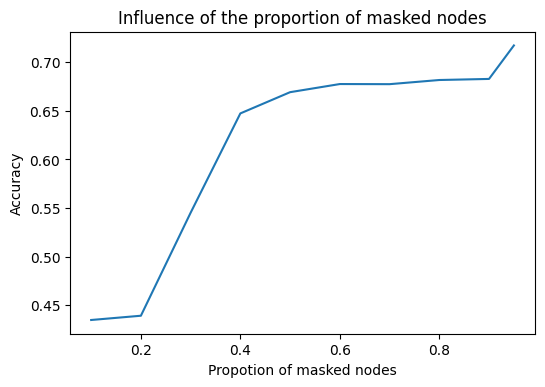

In [17]:
x = [i for i, _ in scores]
y = [i for _, i in scores]
plt.figure(dpi=100)
plt.plot(x, y)
plt.title('Influence of the proportion of masked nodes')
plt.xlabel('Propotion of masked nodes')
plt.ylabel('Accuracy')
plt.show()